<a href="https://colab.research.google.com/github/GianEscher/quantum-lab-finance/blob/main/markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este código implementa o método para análise de portfolios de Markowitz. O script recebe inicialmente um número inteiro, que determina a quantidade de históricos a serem analisados.

Após isso, a data inicial deve ser inserida, seguida da data final da análíse. Ambas devem estar no formato yyyy-mm-dd

O código das ações deverá ser inserido, um a um. A saída é um gráfico da fronteira eficiente gerada.

Abaixo segue a instalação das duas bilbiotecas utilizadas: Yahoo Finance (coleta dos históricos) e Pandas (Análise e processamento de dados)

In [ ]:
!pip install yfinance
!pip install pandas-bokeh





A importação das bilbiotecas instaladas é seguida da importação do numpy, para facilitar o cálculo de raízes quadradas.

In [2]:
import pandas as pd
import pandas_bokeh
import yfinance as yfin
import numpy as np
from pandas_datareader import data as pdr
yfin.pdr_override()

import matplotlib.pyplot as plt

Abaixo segue o script com comentários in-line, de maneira a facilitar o fluxo de execução do código.

insert the number of stocks, my dude: 3
insert the start data, as "yyyy-mm-dd": 2023-05-10
insert the ending data, as "yyyy-mm-dd": 2023-05-18
insert the stock code: GOOG
[*********************100%***********************]  1 of 1 completed
insert the stock code: IBM
[*********************100%***********************]  1 of 1 completed
insert the stock code: AMZN
[*********************100%***********************]  1 of 1 completed
[[0.04114715707882521, 0.0087253775000217, -0.008141104981169137, 0.026761262636103254, 0.0115747111452313], [-0.00917878337977435, 0.016046276158205496, 0.0042331837183598115, 0.0008106231649345707, 0.01822452629746519], [0.0180596952507349, -0.017115333960796283, 0.008525256609829546, 0.019784214370623648, 0.018518504813616384]]
[0.016013480675802466, 0.006027165191838144, 0.009554467416801639]
[0.021918004706048284, 0.003416947374682031, 0.008272705979601483]
[[0.0004803989302943547, -0.00010441527144103599, 0.00010063157250530218], [-0.00010441527144103599,

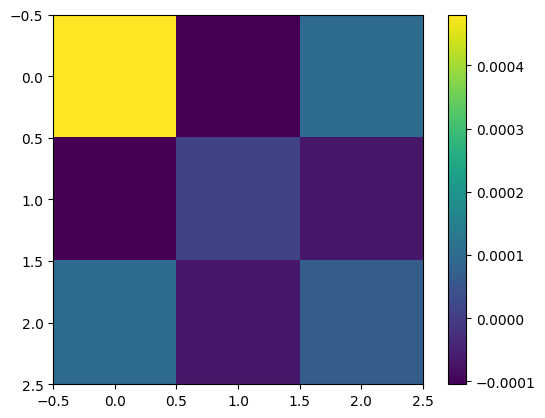

In [6]:

#quatro vetores globais são criados.

#stocks_registry[] serve para conter cada desvio percentual consecutivo dos históricos, ao que este se torna uma matriz ao final do processo.
#gain[] armazena as médias dos desvios percentuais de cada ação.
#volatility[] armazena o desvio padrão dos desvios percentuais de cada ação.
#risks[] se tornará a matriz de risco, após armazenar variânça e covariânça entre cada ação

stocks_registry = []
gain = []
volatility = []
risks = []

#número de ações a ser analisado
n_stocks = int(input('insert the number of stocks, my dude: '))

#a função setup alimenta os quatro vetores globais, a fim de preparar os principais dados necessários para alimentar a função markowitz()

def setup():

  #essas são as duas datas mencionadas no princípio deste documento.
  data_inicial = input('insert the start data, as "yyyy-mm-dd": ')
  data_final = input('insert the ending data, as "yyyy-mm-dd": ')

  #para cada ação, o laço repetirá, processando resultando sempre em uma média, um desvio padrão e um vetor de erros percentuais consecutivos
  #estes, por sua vez, serão adicionados em ordem nos vetores globais correspondentes 
  
  i=0
  while(i<n_stocks):

    #o primeiro dos vetores abaixo recebe os dados de fechamento brutos da ação.
    #o vetor stocks-_gain[], por sua vez, armazena temporariamente os erros percentuais consecutivos calculados, para então
    #adicioná-los à matriz stocks_registry[] e ainda facilitr os cálculos de média e desvio padrão
    
    stocks_raw = []
    stocks_gain = []

    #Observation: apparently, if i append a global list inside another global list, any alterations made to the former will be DINAMICALLY
    #updated in the latter too search for that later. seems like quite the phantasmagorical behaviour

    stocks = input('insert the stock code: ')
    history = pdr.DataReader(stocks, data_inicial, data_final)#recupera os dados do banco de dados do Yahoo Finance

    stocks_raw = history['Close'].tolist()#retira somente a coluna de dados de fechamento do dataframe recebido
    
    #o laço while abaixo calcula os erros percentuais consecutivos
    j=1
    while(j<len(stocks_raw)):
      stocks_gain.append((stocks_raw[j]-stocks_raw[j-1])/stocks_raw[j-1])
      j+=1
    stocks_registry.append(stocks_gain)#adiciona os erros percentuais à matriz global

    #a média é calculada em seguida
    sum = 0
    for a in stocks_gain:
      sum += a
    gain.append(sum/len(stocks_gain))
    
    #cálculo do desvio padrão. Preferiu-se fazê-lo a fim de reduzir o número de raízes calculadas, uma vez que
    #computacionalmente falando, cálculo de potências é mais performático
    sd = 0
    for a in stocks_gain:
      sd += (a-sum)*(a-sum)
    sd == np.sqrt(sd/len(stocks_gain) )   
    volatility.append(sd)

    i+=1

  print(stocks_registry)
  print(gain)
  print(volatility)
  
  
  #construção da matriz de risco
  i=0
  while(i<len(volatility)):
    j=0
    row = []

    while(j<len(volatility)):
      if(i==j):
        row.append(volatility[i]*volatility[i])
        
      else:
        row.append(covar(stocks_registry[i],gain[i],stocks_registry[j],gain[j]))
      j+=1

    risks.append(row)
    i+=1

  
  print(risks)
  print()
  print("Matriz de risco:")
  print()

  plt.imshow(risks, interpolation='nearest')
  plt.colorbar()
  plt.show()

  
  
#função responsável por calcular a covariâça, dado os erros percentuais consecutivos e a média de duas ações
def covar(list_A, mean_A, list_B, mean_B):
  sum = 0
  i=0
  lenght=len(list_A)

  while(i<lenght):
    sum+=(list_A[i]-mean_A)*(list_B[i]-mean_B)
    i+=1
    
  return sum/lenght

setup()

       Retorno     Risco   peso: 1   peso: 2   peso: 3
0     0.014145  0.000282  0.766449  0.101978  0.131573
1     0.009319  0.000047  0.304407  0.624123  0.071470
2     0.008257  0.000018  0.051523  0.462221  0.486256
3     0.009736  0.000051  0.323224  0.540433  0.136343
4     0.009243  0.000053  0.012131  0.110622  0.877246
...        ...       ...       ...       ...       ...
9995  0.009067  0.000034  0.257768  0.610205  0.132028
9996  0.015006  0.000357  0.861498  0.031964  0.106537
9997  0.008059  0.000013  0.087931  0.585119  0.326951
9998  0.012410  0.000167  0.590972  0.272588  0.136440
9999  0.012016  0.000117  0.488024  0.195779  0.316197

[10000 rows x 5 columns]


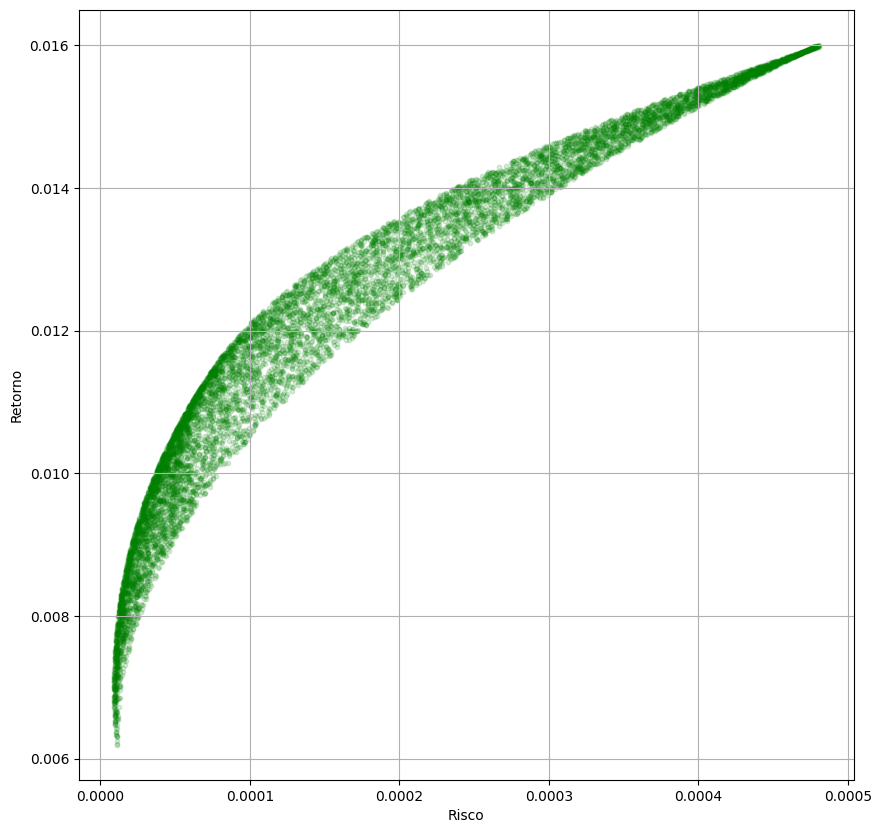

In [59]:
def markowtiz():

  #número de portfolios a ser calculado; definido arbitrariamente
  iterations = 10000

  #vetor contendo retorno total de cada portfolio calculado
  return_total = []

  #vetor contendo risco total de cada portfolio calculado
  risk_total = []

  weight_matrix = []

  #define um dicionário contendo todos os dados
  data = {'Retorno': return_total, 'Risco': risk_total}

  iter = 0
  while(iter<iterations):
    #vetor para conter os pesos gerados
    weights = []

    #primeiro peso é gerado em um conjunto x e ]0,1]
    weights.append(np.random.uniform(low=0.01, high=1.0, size=(1,))[0])
    
    #subtrai o valor do primeiro peso da pool restante
    percentage_aux = 1.0

    #gera cada peso entre 1 e n_stocks-1
    i=1
    while(i<(n_stocks-1)):
      percentage_aux -= weights[i-1]
      weights.append(np.random.uniform(low=0.01, high=(percentage_aux), size=(1,))[0])
      
      i += 1

    #o último peso não deve ser gerado, bastando calcular o restante da porcentagem (a carteira do portfolio sempre gera com 100%)
    weights.append(percentage_aux-weights[i-1])

    #soma todos os termos que consistem de variança*peso^2
    i = 0
    sum_a = 0
    while(i<n_stocks):
      sum_a += weights[i]*weights[i]*volatility[i]*volatility[i]
      i += 1

    #produtorio dos pesos para facilitar na iteração seguinte
    productory_weights = 1
    for a in weights:
      productory_weights *= a
    
    #soma todos os termos que consistem de 2*produtorio(peso)*covar
    i = 0
    sum_b = 0
    while(i<n_stocks):
      #o iterador j é feito dessa forma a fim de retirar somente as covarianças da matriz de risco, sem percorrer o mesmo valor novamente
      j=i+1
      while(j<n_stocks):
        sum_b += 2*productory_weights*risks[i][j]
        j += 1
      i += 1

    risk_total.append(sum_a + sum_b)

    i = 0
    sum = 0
    while(i<n_stocks):
      sum += gain[i]*weights[i]
      i += 1

    return_total.append(sum)

    weight_matrix.append(weights)

    iter += 1

  i = 0
  while (i<n_stocks):
    j=0
    weight_column = []

    while(j<iterations):
      weight_column.append(weight_matrix[j][i])
      j += 1

    data["peso: " + str(i+1)] = weight_column

    i += 1
  
  portfolios = pd.DataFrame(data)

  print(portfolios)

  portfolios.plot.scatter(x='Risco', y='Retorno', c='green', marker='o', s=10, alpha=0.15, grid=True, figsize=[10,10])

markowtiz()